## Introduction

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, the Titanic sank after colliding with an iceberg, resulting in the deaths of over 1,500 passengers and crew. The tragedy has since become a well-known case study in data science and predictive modeling due to the availability of detailed passenger data.

This project aims to analyze the Titanic dataset and build a machine learning model that can accurately predict whether a given passenger would have survived the disaster. By exploring and modeling key features such as age, sex, ticket class, fare, and port of embarkation, this project provides insights into the factors that contributed to survival outcomes.

---

## Problem Statement

The objective of this classification task is to predict the survival status of Titanic passengers using machine learning. Given various passenger attributes such as age, gender, class, fare, and family relationships aboard, the goal is to build a model that outputs:

- `1` if the passenger survived
- `0` if the passenger did not survive

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Dataset

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
# I previewed the first five rows

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# I previewed the last 5 rows

df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# I checked for the dimension of the dataset

df.shape

(891, 12)

From the above, the dataset has 891 rows and 12 columns.

In [6]:
# I checked for more information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From the above, the column are not appropriately categorized. The next step is to appropriately categorize them.

Understanding the uniqueness of each columns

In [7]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

The above shows the ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)

In [8]:
df['Survived'].unique()

array([0, 1], dtype=int64)

The above shows the Survival status (0 = No, 1 = Yes)

In [9]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

The above shows Gender of the passenger (male or female)

In [10]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

The above represents the Number of siblings or spouses aboard the Titanic. 

- Alone = 0
- With 1 relative = 1
- With 2 relatives = 2
- With 3 relatives = 3
- With 4 relatives = 4
- With 5 relatives = 5
- With 8 relatives = 8

In [11]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

The above represents the port of embarkation:
- C = Cherbourg (France)
- Q = Queenstown (Ireland)
- S = Southampton (England)

In [12]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

The above represents the Number of parents or children aboard the Titanic.

In [13]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

The Cabin column contains the cabin number assigned to each passenger, with the first letter typically indicating the deck location on the ship. 
Inorder to enhance the dataset and potentially improve model performance, I performed feature engineering by extracting the first letter from each cabin entry to create a new Deck feature. 
This new feature will capture the passenger’s deck information. 

In [14]:
df['Deck'] = df['Cabin'].str.extract(r'([A-Za-z])')

# for Nan, I filled them with unknown
df['Deck'] = df['Cabin'].str[0].fillna('U')

In [15]:
df['Deck'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

After extracting the first letter from the Cabin column, I identified the following unique deck values: 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', and 'U'. 

Here, each letter (A–G, T) represents a specific deck on the Titanic, while 'U' indicates passengers with missing or unassigned cabin information.

The Ticket column contains both letters and numbers, representing different ticket types and numbers. 

To capture potential patterns related to ticket numbers, I extracted the numeric part of each ticket into a new feature (Ticket_num). This allows the model to utilize any information encoded in the ticket numbers, while ignoring the non-numeric prefixes and suffixes.

In [16]:
# I reconfirmed the columns

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Deck'],
      dtype='object')

After reconfirming the columns, the 'Deck' column has been added.

In [17]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
217,218,0,2,"Jacobsohn, Mr. Sidney Samuel",male,42.0,1,0,243847,27.000,NaN,S,U
468,469,0,3,"Scanlan, Mr. James",male,NaN,0,0,36209,7.725,NaN,Q,U
772,773,0,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.500,E77,S,E
733,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.000,NaN,S,U
191,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.000,NaN,S,U


In [18]:
# I checked for duplicates

df.duplicated().sum()

0

From, the above, there are no duplicates. 

In [19]:
# I checked for missing values

df.isna().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Deck             0
dtype: int64

In [20]:
# I checked for the percentage of missing values

df.isna().sum().sort_values(ascending = False) / len (df) * 100

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Deck            0.000000
dtype: float64

Based on the data exploration:

- The Cabin column has approximately 77% missing values.
- The Age column has about 19.86% missing values.
- The Embarked column has 0.2% missing values.

As part of feature engineering, I extracted the first letter from the Cabin column to create a new Deck feature. Any missing values in Deck were replaced with 'U' (Unknown) to indicate unassigned or missing deck information.

Moving forward, I will focus on handling missing values in the dataset. Since the relevant information from Cabin has been captured in the Deck column, I will drop the original Cabin column and proceed with imputing missing values in the remaining features.

## Filling Missing Values

In [21]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

I filled 'Age' with median because the median age minimizes the effect of outliers and preserve the distribution of the data while for the 'Embarked', I filled with mode because it is a standard approach for categorical variables with few missing values.

# Dropping Columns

In [22]:
df.drop('Cabin', axis=1, inplace=True)
df.drop('PassengerId', axis = 1, inplace = True)
df.drop('Ticket', axis = 1, inplace = True)

- The Cabin column was removed because it contained a high percentage of missing values, and its relevant information was already captured in the engineered Deck feature. 
- The PassengerId column was dropped as it serves only as a unique identifier and does not provide any predictive value for the modelling process.
- I performed feature engineering on Ticket to extract the numeric part as Ticket_num, so the original Ticket column was dropped.
- The Ticket column contains many unique values, which can be challenging for modelling.

In [23]:
# I rechecked the columns

df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Deck'],
      dtype='object')

## Reassigning Categorical And Numerical Columns

I appropriately reassigned the numerical and categorical columns in the dataset to ensure that each feature is treated according to its data type. 

This step is important for proper preprocessing, encoding, and modeling, as it allows for the correct application of techniques such as scaling for numerical features and encoding for categorical features.

In [24]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Deck'],
      dtype='object')

In [25]:
# I converted the columns I wanted to reassign to a list and looped through it to reassign

reassigned_cols = ['Survived','Pclass', 'Sex', 'SibSp', 'Deck']

for col in reassigned_cols:
    df[col] = df[col].astype('category')

In [26]:
# I rechecked the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       891 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    int64   
 7   Fare      891 non-null    float64 
 8   Embarked  891 non-null    object  
 9   Deck      891 non-null    category
dtypes: category(5), float64(2), int64(1), object(2)
memory usage: 40.4+ KB


In [27]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['category', 'object']).columns.tolist()

In [28]:
num_cols

['Age', 'Parch', 'Fare']

In [29]:
cat_cols

['Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Embarked', 'Deck']

After reassigning the appropriate columns as categorical or numerical, the dataset is properly structured for analysis. I can now move forward to building and evaluating predictive models.

## Feature Selection

<Axes: xlabel='Survived'>

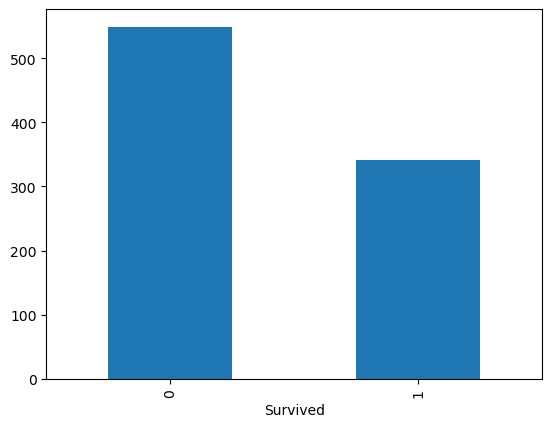

In [30]:
df['Survived'].value_counts().plot(kind='bar')

The bar chart above shows that the target variable (Survived) is imbalanced, with more passengers not surviving than surviving. 

To ensure that this class imbalance is maintained in both the training and test sets, I used the stratify=y parameter when splitting the data. 

This approach preserves the original proportion of each class in both subsets, which is important for building and evaluating classification models fairly.

In [31]:
# I imported the necessary library

from sklearn.model_selection import train_test_split

In [32]:
X = df.drop(columns = ['Survived'])
y = df['Survived']

In [33]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 42, stratify = y)

In [34]:
X_train.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Deck'],
      dtype='object')

## Data Preprocessing

I scaled the numerical features to ensure they are on a similar range, which helps improve model performance. 

I also encoded the categorical features into a numerical format so they can be used effectively by machine learning algorithms.



In [35]:
# I imported necessary library

from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [36]:
scaler = StandardScaler()

In [37]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [38]:
encoder = OneHotEncoder()

In [39]:
cat_cols = ['Pclass', 'Sex', 'SibSp', 'Embarked', 'Deck']

In [40]:
cat_cols

['Pclass', 'Sex', 'SibSp', 'Embarked', 'Deck']

I updated the list of categorical columns to exclude both the target column (Survived) and the Name column. 

The Name column is not included in encoding or modeling because it is a unique identifier and does not provide predictive value. Only relevant categorical features are retained for encoding

In [41]:
train_cat = encoder.fit_transform(X_train[cat_cols])
test_cat = encoder.transform(X_test[cat_cols])

In [42]:
train_cat = train_cat.toarray()
test_cat = test_cat.toarray()

I converted the encoded categorical features from sparse matrices to dense arrays using .toarray(). 

This step is necessary because some machine learning algorithms and further processing steps require input data in a dense format.

In [43]:
## Combining the numerical and categorical columns

train_processed = np.hstack((X_train[num_cols], train_cat))
test_processed = np.hstack((X_test[num_cols], test_cat))

I combined the scaled numerical features and the encoded categorical features to create the final training and test datasets. 

This ensures that all relevant features are included and properly formatted for model training and evaluation.

## Model Training

I trained and evaluated multiple classification models including Logistic Regression, Decision Tree, Random Forest, and Gradient Boosting. 

Each model was compared using accuracy, precision, and recall metrics, it helped to determine which model performs best on the Titanic dataset for predicting passenger survival.

In [44]:
# I imported the necessary libraries

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [45]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

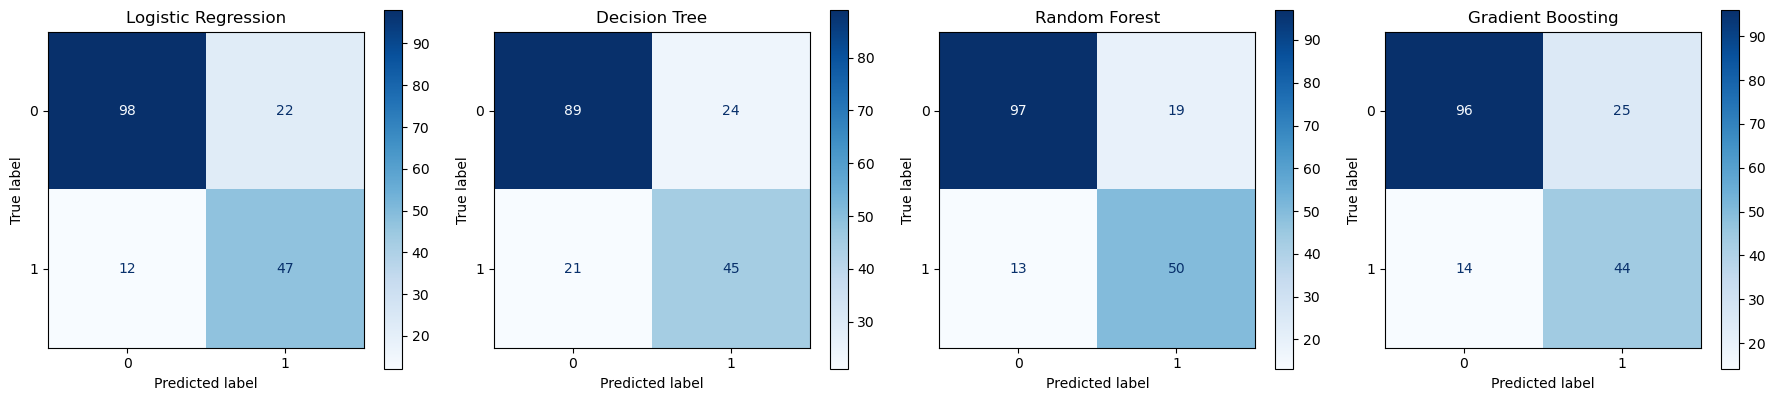


Classification Metrics
                 Logistic Regression  Decision Tree  Random Forest  \
Train Accuracy                 0.827          0.983          0.983   
Test Accuracy                  0.810          0.749          0.821   
Precision Score                0.681          0.652          0.725   
Recall Score                   0.797          0.682          0.794   

                 Gradient Boosting  
Train Accuracy               0.906  
Test Accuracy                0.782  
Precision Score              0.638  
Recall Score                 0.759  


In [46]:
results = {}
fig, axes = plt.subplots( 1, 4 , figsize = (18,4))

for (name, model), ax in zip(models.items(), axes.flatten()): 
    
    # I trained the model
    model.fit(train_processed, y_train)

     # predict train and test 
    train_pred = model.predict(train_processed)
    test_pred = model.predict(test_processed)

    # evaluate the prediction
    train_score = accuracy_score (train_pred, y_train)
    test_score = accuracy_score (test_pred, y_test)
    precision = precision_score (test_pred, y_test)
    recall = recall_score(test_pred, y_test)

    # I stored my results in a dataframe
    results[name] = {
        "Train Accuracy": train_score,
        "Test Accuracy": test_score,
        "Precision Score": precision,
        "Recall Score": recall
    }

    # I plotted a confusion matrix
    cm = confusion_matrix(test_pred, y_test)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(ax = ax, cmap ='Blues')
    ax.set_title(name)

plt.tight_layout()
plt.show()

# print metrics
print('\nClassification Metrics')
metrics_df = pd.DataFrame(results)
print(metrics_df.round(3))

From the above:
- Logistic Regression performed consistently with a good balance between test accuracy (0.81) and recall (0.797), making it a solid baseline.
- Decision Tree achieved high training accuracy (0.983) but a lower test accuracy (0.749), indicating possible overfitting.
- Random Forest showed strong overall performance, with high test accuracy (0.821) and strong recall (0.794), making it one of the best models.
- Gradient Boosting had slightly lower test metrics than Random Forest but showed less overfitting than Decision Tree. Precision was a bit lower (0.638), which could be due to class imbalance.


I also visualized the confusion matrix for each model to better understand the specific prediction patterns. 
- the Random Forest achieved the best balance of true positives and true negatives, with minimal false predictions.
- the Logistic Regression model also performed well, with a strong recall score, meaning it correctly identified most survivors. 
- the Decision Tree showed signs of overfitting, with perfect training accuracy but lower performance on unseen data.
- finally, Gradient Boosting provided competitive results with a moderate trade-off between precision and recall.

## COMMENTS

I initially trained the model without transformations or class balancing. However, to improve results:

- I checked for skewness in numerical features and apply log transformation where necessary to reduce distortion and improve input quality.
- I also used class_weight='balanced' to address the class imbalance in the target variable and help the model treat both classes more fairly.

Combining these strategies might lead to a more accurate and generalizable model.

## DATA VISUALIZATION

1.  Visualizing the Numerical Columns
  
Before applying any skewness correction or transformations, I visualized the distribution of key numerical features using histograms with KDE (Kernel Density Estimation) curves. This helped me observe the shape of each distribution and identify features that are heavily skewed or have outliers. 

In [47]:
# I defined the numerical columns

num_cols

['Age', 'Parch', 'Fare']

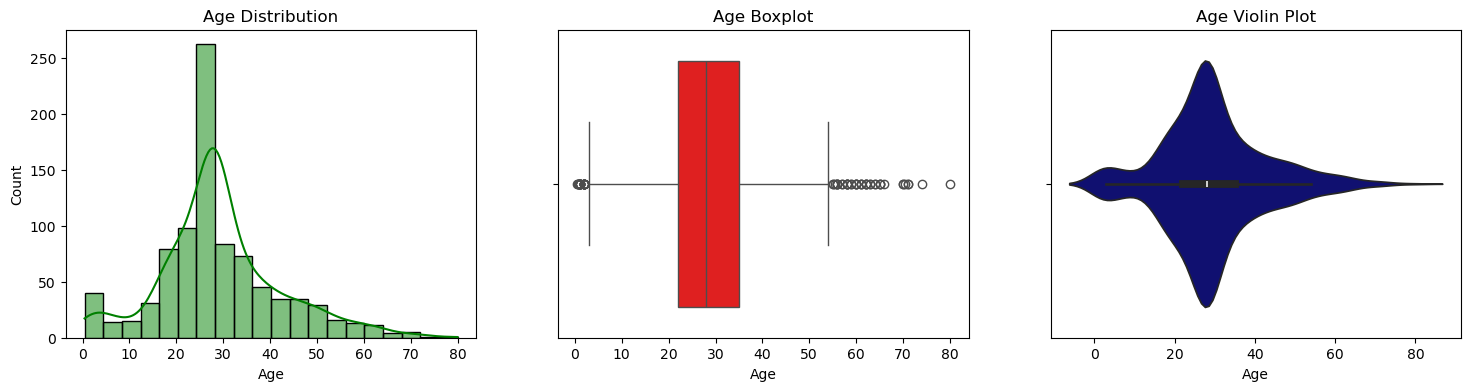

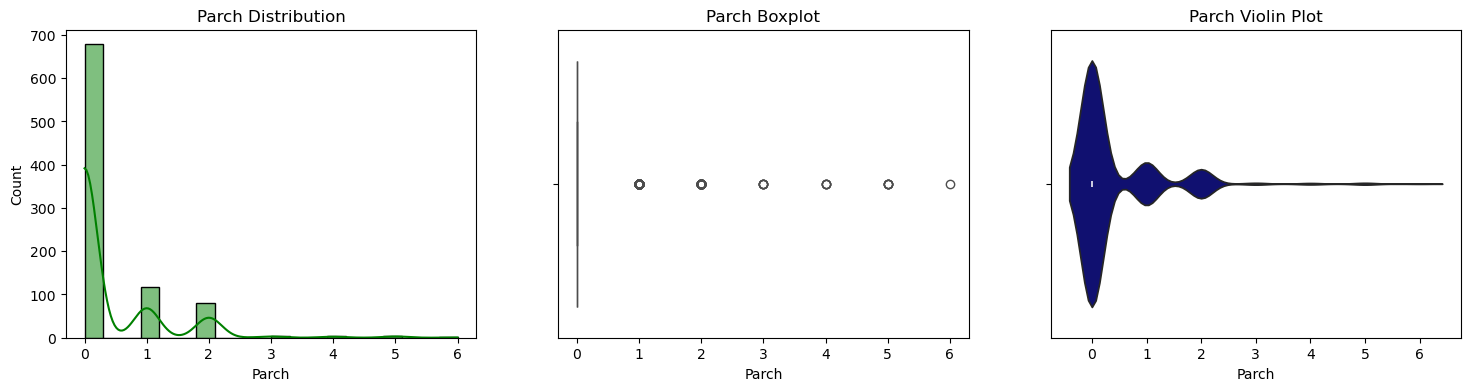

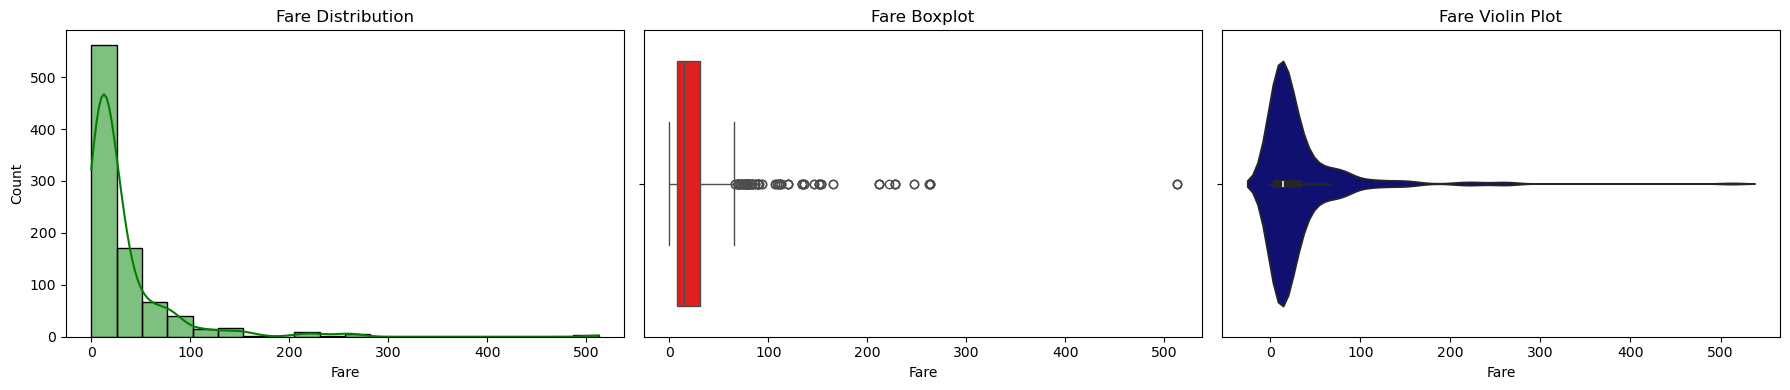

In [48]:
# I looped through the list to visualize

for col in num_cols:
    fig, axes = plt.subplots(1, 3, figsize=(18, 4))

    # for histogram
    sns.histplot(df[col], kde=True, bins=20, color='green', ax=axes[0])
    axes[0].set_title(f'{col} Distribution')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Count')

    # for boxplot
    sns.boxplot(x=df[col], color='red', ax=axes[1])
    axes[1].set_title(f'{col} Boxplot')
    axes[1].set_xlabel(col)

    # for violinplot
    sns.violinplot(x=df[col], color = 'navy', ax=axes[2])
    axes[2].set_title(f'{col} Violin Plot')
    axes[2].set_xlabel(col)

plt.tight_layout()
plt.show()

I visualized the distributions of the numerical features ('Age', 'Parch', and 'Fare') using histograms, boxplots, and violin plots to understand their shape, spread, and skewness.

- Age is slightly right-skewed, centered around 20–30 years. Most passengers were young adults with a few elderly outliers. The distribution is mostly normal, requiring little to no transformation.

- Parch (number of parents/children on board) is extremely right-skewed. The majority of values are zero, indicating most passengers traveled without close family. This may be better treated as a categorical or binary feature rather than a continuous one.

- Fare is heavily right-skewed with large outliers. Most passengers paid low fares, but a small group paid significantly higher amounts. A log transformation is ideal to reduce skew and normalize this feature.

## Treating 'Parch' as Categorical

Given that 'Parch' is a discrete variable with limited unique values and a heavily imbalanced distribution, I decided to convert it into a categorical feature. 

In [49]:
# I checked for the uniqueness of Parch

df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [50]:
# I converted Parch to a categorical column

df['Parch'] = df['Parch'].astype('category')

In [51]:
# I reconfirmed the category

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       891 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Fare      891 non-null    float64 
 8   Embarked  891 non-null    object  
 9   Deck      891 non-null    category
dtypes: category(6), float64(2), object(2)
memory usage: 34.6+ KB


## Skewness

I checked the skewness of the numerical columns to analyze the shape of their distributions. Skewness helps identify features that are not normally distributed, which can affect model performance. 

For highly skewed features, I applied the log transformation to reduce skewness and improve the model’s ability to learn from the data.

In [52]:
num_cols = ['Age', 'Fare']

In [53]:
skewness = df[num_cols].skew().sort_values(ascending=False)
skewness

Fare    4.787317
Age     0.510245
dtype: float64

From the skewness calculation, 

- 'Fare' has a very high skewness (4.79), indicating that the distribution is extremely right-skewed. This further means that most passengers paid relatively low fares, but a few paid significantly higher amounts.
- 'Age' has a moderate skew (0.51); although it’s slightly skewed to the right, it doesn’t require transformation.

Therefore, I proceeded to log_transformation of the 'Fare' column

In [54]:
# I applied log transformation on 'Fare' (use log1p to handle zero values safely)

df['Fare_log'] = np.log1p(df['Fare'])

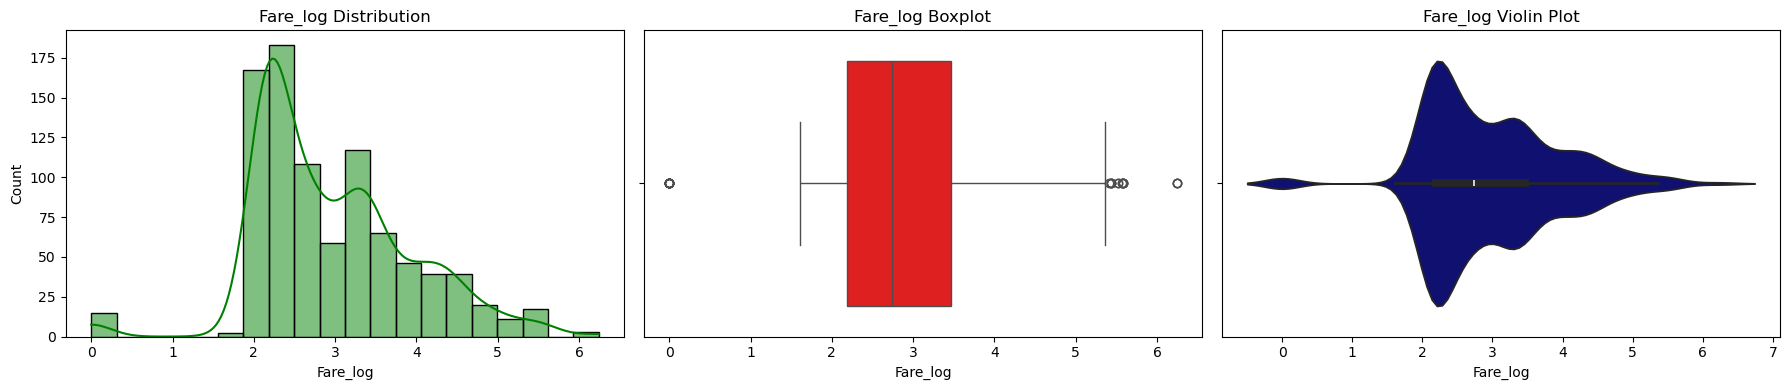

In [55]:
# I visualised the transformed column

col = ['Fare_log']

fig, axes = plt.subplots(1, 3, figsize=(18, 4))

for c in col:

    # for histogram
    sns.histplot(df[c], kde=True, bins=20, color='green', ax=axes[0])
    axes[0].set_title(f'{c} Distribution')
    axes[0].set_xlabel(c)
    axes[0].set_ylabel('Count')

    # for boxplot
    sns.boxplot(x=df[c], color='red', ax=axes[1])
    axes[1].set_title(f'{c} Boxplot')
    axes[1].set_xlabel(c)

    # for violinplot
    sns.violinplot(x=df[c], color = 'navy', ax=axes[2])
    axes[2].set_title(f'{c} Violin Plot')
    axes[2].set_xlabel(c)

plt.tight_layout()
plt.show()

After I applied the log transformation to the 'Fare' feature (creating 'Fare_log'), I visualized the updated distribution using a histogram, boxplot, and violin plot.

- The histogram now shows a much more symmetrical and normalized distribution, reducing the original heavy right skew.
- The boxplot confirms that extreme outliers have been reduced, while the overall spread is more balanced.
- The violin plot further shows that values are more central, with a better distribution.

The log transformation effectively prepared the 'Fare' feature for modeling.

2.  Visualizing the Categorical Columns

In [56]:
# I recalled the categorical columns

cat_cols = ['Parch', 'Pclass', 'Sex', 'SibSp', 'Embarked', 'Deck']

The target column 'Survived' is not included at this stage, as it was already visualized earlier using a bar chart, and has been excluded from the feature set during modeling.

Here, I focused on visualizing the individual distributions of key categorical features such as 'Sex', 'Pclass', 'Embarked', and 'Deck'. This helped identify any class imbalance and provided insight into the composition of the dataset.

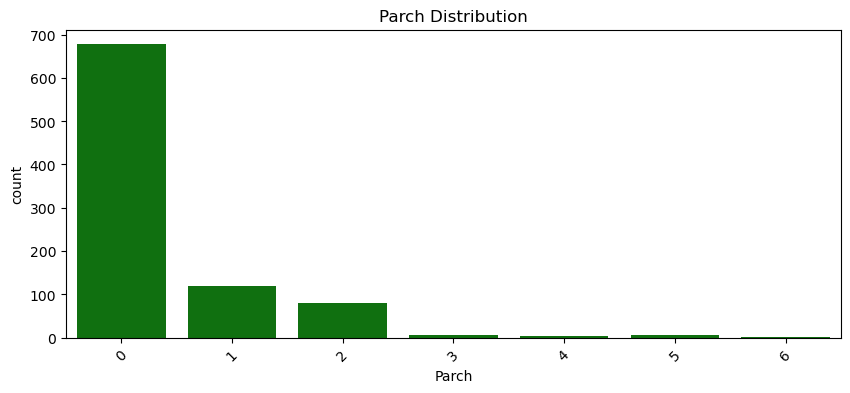

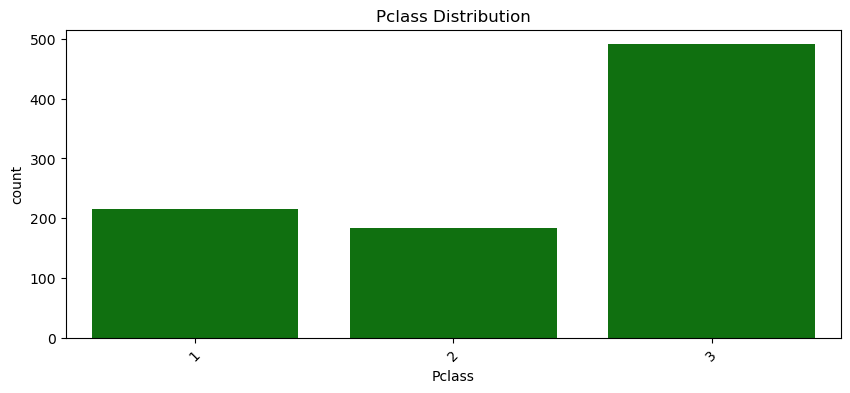

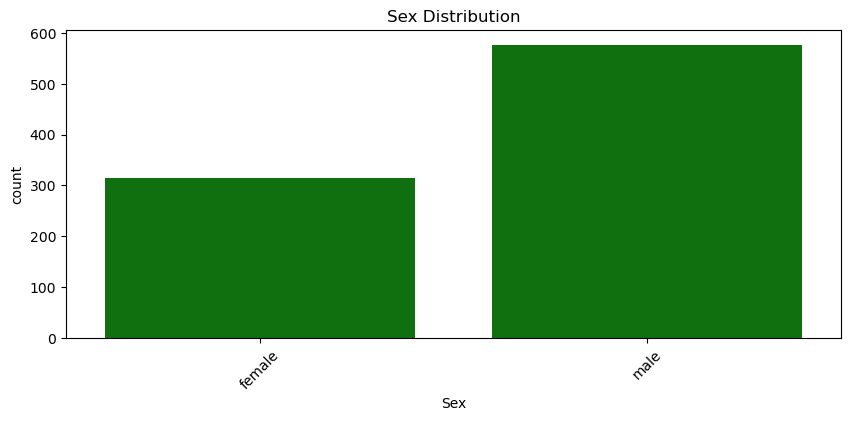

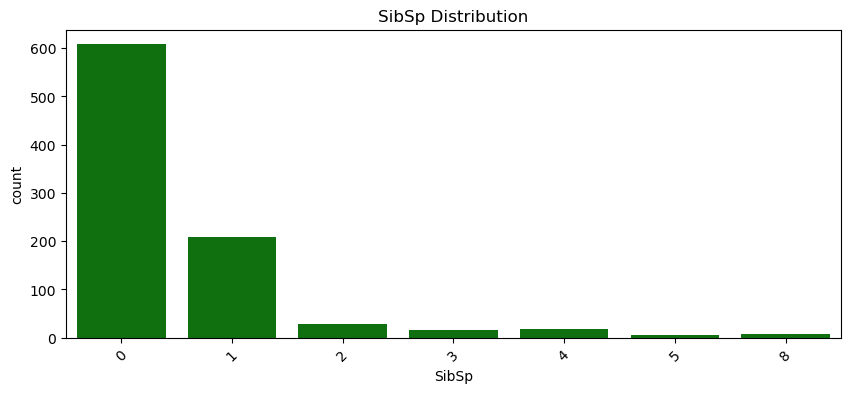

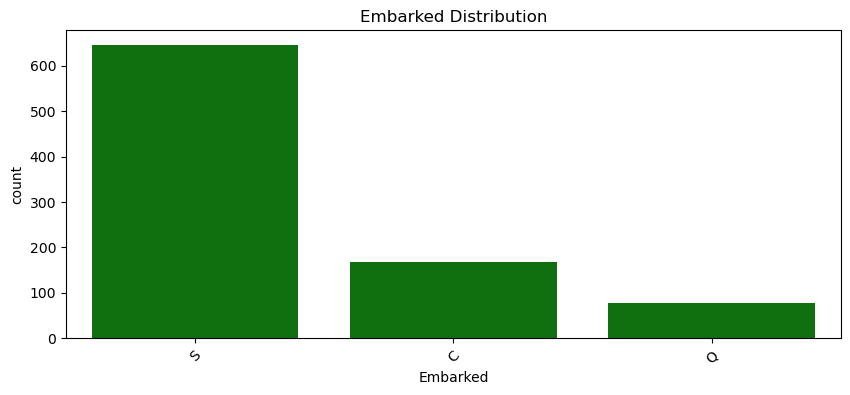

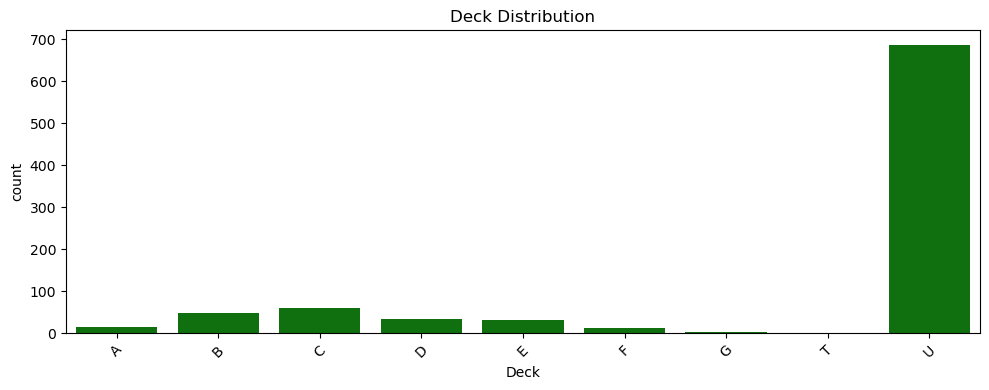

In [57]:
# I looped through the categorical columns to visualize it

for col in cat_cols: 
    plt.figure(figsize = (10,4))
    sns.countplot(x=col, data = df, color = 'green')
    plt.title(f'{col} Distribution')
    plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

From the above visualization:

- Parch Distribution: Most passengers had 0 parents/children aboard (Parch = 0) while a small number had Parch = 1 or 2, and very few had Parch greater than 3.
- PClass Distribution: The third class (Pclass = 3) has the highest number of passengers, followed by first class (Pclass = 1), and second class (Pclass = 2). This shows that most people on the Titanic were third-class passengers.
- Sex Distribution: There were more males than females onboard. This shows that the majority of passengers were male.
- SibSp Distribution: Most passengers had 0 siblings/spouses onboard, and a significantly smaller number had 1 or 2, with very few having more than that.
- Embarked Distribution: One embarkation port dominated, S (Southampton). C and Q are much smaller.
- Deck Distribution: The 'U' category (unknown) is by far the largest. The rest (Decks A through G, T) have small counts.

## Final Model Prediction After Data Preparation

After I completed the data cleaning, transformation, and feature engineering, I reprocessed the dataset and retrained the model using Logistic Regression and other models. 

This prediction step incorporated all improvements I have made to the data and should yield better and more balanced performance metrics compared to the initial raw predictions.

In [58]:
# I recalled the columns

df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Deck', 'Fare_log'],
      dtype='object')

## Dropping Original Fare Column

Since the 'Fare' feature was highly skewed and I applied a log transformation to produce 'Fare_log', I dropped the original 'Fare' column to avoid redundancy and potential multicollinearity. The transformed feature will be used in modelling going forward.

In [59]:
df.drop('Fare', axis=1, inplace=True)

In [60]:
# I reconfirmed the columns
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Embarked', 'Deck', 'Fare_log'],
      dtype='object')

From the above, the original 'Fare' column has been dropped since its skewness was corrected using a log transformation ('Fare_log'). I then proceeded with building and evaluating my predictive models using the transformed dataset.

## Feature and Target selection

In [61]:
# I reconfirmed the numerical columns

num_cols = ['Age', 'Fare_log']

In [62]:
# I reassigned the categorical columns

cat_cols = ['Survived','Parch', 'Pclass', 'Sex', 'SibSp', 'Embarked', 'Deck']

In [63]:
cat_cols

['Survived', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Embarked', 'Deck']

## Data Splitting

In [64]:
# I imported the necessary library

from sklearn.model_selection import train_test_split

In [65]:
X = df.drop(columns = ['Survived'])
y = df['Survived']

In [66]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 42, stratify = y)

In [67]:
# I previewed the X_train columns

X_train.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'Deck',
       'Fare_log'],
      dtype='object')

## Data Preprocessing

I scaled the numerical features to ensure they are on a similar range, which helps improve model performance. 

I also encoded the categorical features into a numerical format so they can be used effectively by machine learning algorithms.

In [68]:
# I imported necessary library

from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [69]:
scaler = StandardScaler() 

In [70]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [71]:
encoder = OneHotEncoder()

In [72]:
cat_cols =  ['Parch', 'Pclass', 'Sex', 'SibSp', 'Embarked', 'Deck']

In [73]:
train_cat = encoder.fit_transform(X_train[cat_cols])
test_cat = encoder.transform(X_test[cat_cols])

In [74]:
train_cat = train_cat.toarray()
test_cat = test_cat.toarray()

I converted the encoded categorical features from sparse matrices to dense arrays using .toarray().

This step is necessary because some machine learning algorithms and further processing steps require input data in a dense format.

## Combining the numerical and categorical columns

I combined the scaled numerical features and the encoded categorical features to create the final training and test datasets.

This ensures that all relevant features are included and properly formatted for model training and evaluation.

In [75]:
train_processed = np.hstack((X_train[num_cols], train_cat))
test_processed = np.hstack((X_test[num_cols], test_cat))

## Model Training

I retrained and evaluated multiple classification models including Logistic Regression, Decision Tree, Random Forest, and Gradient Boosting. 

Each model was again compared using accuracy, precision, and recall metrics, it helped to determine which model performs best on the Titanic dataset for predicting passenger survival.

In [76]:
# I imported the necessary libraries

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [77]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

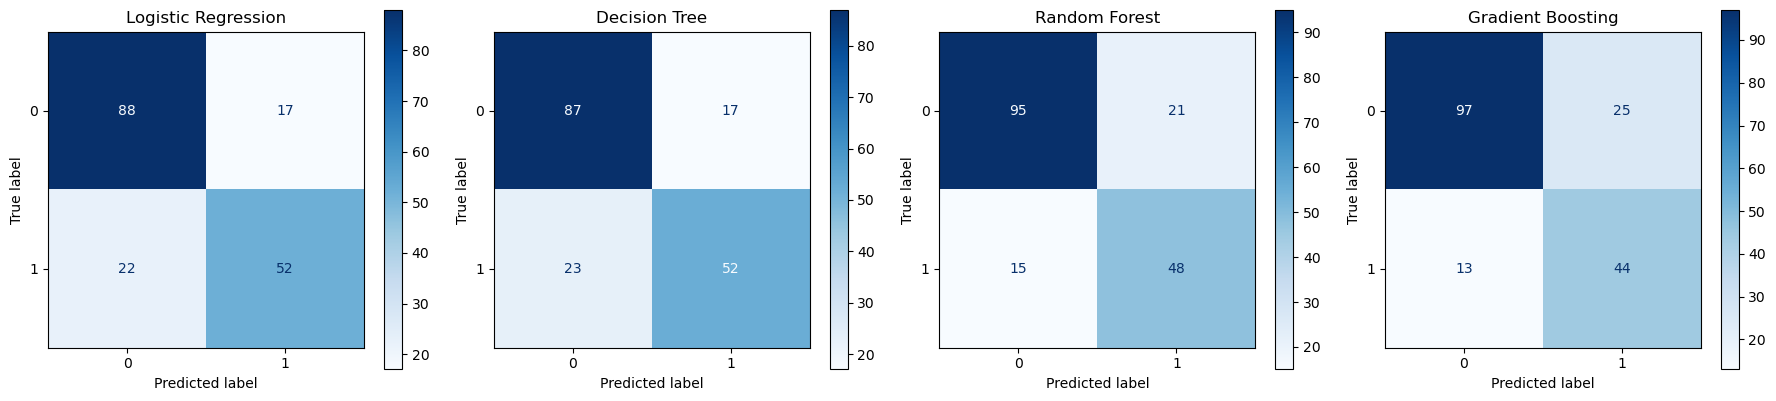


Classification Metrics
                 Logistic Regression  Decision Tree  Random Forest  \
Train Accuracy                 0.806          0.983          0.983   
Test Accuracy                  0.782          0.777          0.799   
Precision Score                0.754          0.754          0.696   
Recall Score                   0.703          0.693          0.762   

                 Gradient Boosting  
Train Accuracy               0.907  
Test Accuracy                0.788  
Precision Score              0.638  
Recall Score                 0.772  


In [78]:
results = {}
fig, axes = plt.subplots( 1, 4 , figsize = (18,4))

for (name, model), ax in zip(models.items(), axes.flatten()): 
    
    # I trained the model
    model.fit(train_processed, y_train)

     # I predicted train and test 
    train_pred = model.predict(train_processed)
    test_pred = model.predict(test_processed)

    # I evaluated the prediction
    train_score = accuracy_score (train_pred, y_train)
    test_score = accuracy_score (test_pred, y_test)
    precision = precision_score (test_pred, y_test)
    recall = recall_score(test_pred, y_test)

    # I stored my results in a dataframe
    results[name] = {
        "Train Accuracy": train_score,
        "Test Accuracy": test_score,
        "Precision Score": precision,
        "Recall Score": recall
    }

    # I plotted a confusion matrix
    cm = confusion_matrix(test_pred, y_test)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(ax = ax, cmap ='Blues')
    ax.set_title(name)

plt.tight_layout()
plt.show()

# I printed the metrics
print('\nClassification Metrics')
metrics_df = pd.DataFrame(results)
print(metrics_df.round(3))

To address the moderate class imbalance in the target variable ('Survived'), I used the (class_weight='balanced') function in the 'Logistic Regression', 'Decision Tree', and 'Random Forest' classifiers. This was done to improve the model's sensitivity to the minority class without altering the dataset.

In addition, I set the 'max_iter=1000' parameter in 'LogisticRegression' to allow the optimization algorithm and this is important because after data preprocessing steps like scaling, encoding, and feature transformation, model complexity 

Worthy of note is that 'GradientBoostingClassifier' does not support the 'class_weight' function.

### Model Overview

- Logistic Regression had a solid balance with good test performance and strong precision (0.754), but missed some survivors (recall: 0.703).
- Decision Tree showed signs of overfitting with a perfect training score but slightly lower test recall (0.693).
- Random Forest achieved the best overall balance between accuracy (0.799), precision, and recall (0.762), making it a reliable performer.
- Gradient Boosting had the highest recall (0.772), making it suitable for minimizing false negatives, though at the cost of lower precision.

### Confusion Matrix Insights

By plotting and analyzing the confusion matrices, I assessed exactly how each model handled classification errors (false positives vs. false negatives).

Random Forest maintained the strongest generalisation, while Gradient Boosting was most effective at identifying survivors.

## Comparison of Model Performance Before and After Transformation

After completing data preprocessing, including log transformation of the 'Fare' feature, scaling numerical features, and applying 'class_weight='balanced' to handle class imbalance, I retrained the models and compared their performance against the results obtained from the raw, untransformed data.

### Key Observations:

- Logistic Regression:
  - Test accuracy slightly decreased (0.810 → 0.782), but precision significantly improved (0.681 → 0.754), indicating fewer false positives.
  - However, recall dropped (0.797 → 0.703), meaning the model missed more actual survivors.

- Decision Tree:
  - Improved test accuracy (0.749 → 0.777) and slightly better recall and precision.
  - Still prone to overfitting (train accuracy remains very high at 0.983), but transformation made it more generalizable.

- Random Forest:
  - Slight drop in all metrics, but it still maintained strong overall performance.
  - Recall remained high (0.794 → 0.762) with moderate precision.

- Gradient Boosting:
  - Results were mostly stable.
  - Recall increased slightly (0.759 → 0.772), further improving its ability to identify survivors.
  - Precision remained low, which indicates a higher number of false positives.

## Note on Correlation Matrix

I did not include a correlation matrix in this analysis. While it can help identify strong relationships between numerical features, especially for linear models like logistic regression, it wasn't necessary here. 

Since my dataset had relatively few numerical features and I used models like Random Forest and Gradient Boosting, which handle correlations well, the analysis and predictions remained reliable without it.

## Conclusion

The transformation had an impact on model performance:
- Random Forest had the best overall balance between accuracy and recall, making it the strongest generalized model for this classification task.
- Gradient Boosting showed the highest recall, which may be preferred in scenarios where identifying as many survivors as possible is critical.
- Logistic Regression had the highest precision, indicating fewer false positives. 

Overall, the machine learning built for this project effectively addressed the problem statement, producing valuable predictions that could be used for further decision-making or historical insights.